# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 6 de octubre, 2020 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

In [ ]:
from sympy import *
J = Function("J")
b0 = Symbol("beta0")
b1 = Symbol("beta1")
b = Symbol("beta")
bj = Symbol("beta_j")
m = Symbol ("m")
n = Symbol ("n")
y = Symbol ("y")
i = Symbol ("i")
j = Symbol ("j")
x = Symbol ("x")


suma = Sum((Indexed(y,i)-b0-b1*Indexed(x,i))**2,(i,1,m))

Costo= Eq(J(b0,b1), 1/(2*m)*suma)

Costo

In [ ]:
Parcial1 = Eq(Derivative(Costo.lhs,b0),Derivative(Costo.rhs,b0)).doit()
simplify(Parcial1)

In [ ]:
Parcial2 = Eq(Derivative(Costo.lhs,b1),Derivative(Costo.rhs,b1)).doit()
simplify(Parcial2)

#### En general

In [ ]:
subsuma = Sum(Indexed(b,j)*Indexed(x,j),(j,0,n))
sumag = Sum((Indexed(y,i)-subsuma)**2,(i,1,m))

Costog = Eq(J(b),1/(2*m)*sumag)

In [ ]:
subsuma

In [ ]:
sumag

In [ ]:
Costog

In [ ]:
Parcialj = Eq(Derivative(Costog.lhs,b0),Derivative(Costog.rhs,b0)).doit()
simplify(Parcialj)

In [ ]:
Derivative(Costog.lhs,bj)

In [ ]:
Derivative(Costog.rhs,bj)

## Problema 2

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [1]:
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
X = np.linspace(1,1000,100)
Y = np.linspace(1,1000,100)

expr = Costo.rhs.subs([(m,10)])
func=lambdify([b0,b1],Costo.rhs) 

expr


**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [2]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Text(0, 0.5, 'Second')

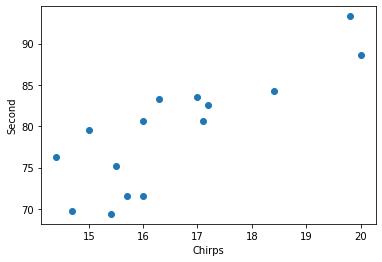

In [7]:
datos = np.loadtxt('data/chirps.txt', dtype="float", delimiter="\t", skiprows=1)
X = datos[:,0]
Y = datos[:,1]
plt.scatter(X,Y)
plt.xlabel('Chirps')
plt.ylabel('Second')

In [29]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia, que tanto nos estamos acercando
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta (con la formula de betaj)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            #En el if estamos checando la convergencia
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        #Producto punto
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        #La diferencia
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    

In [30]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0)
r.gradientDescent(X, Y)

<ipython-input-29-018ad3860c6c>:41: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J - prep_J) <= self.tols:
<ipython-input-29-018ad3860c6c>:36: RuntimeWarning: invalid value encountered in subtract
  self.beta = self.beta - self.alpha * self.gradiente(Xt, y)


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

## Problema 5

Use el archivo `radioactive_decay.dat`

In [32]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'Remaining')

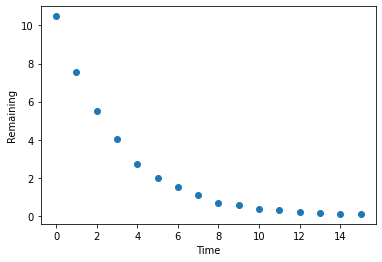

In [36]:
datos2 = np.loadtxt('data/radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=1)
time = datos2[:,0]
N = datos2[:,1]
plt.scatter(time,N)
plt.xlabel('Time')
plt.ylabel('Remaining')

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.